In [2]:
import pandas as pd                #for handling datasets
import statsmodels.api as sm       #for statistical modeling
import pylab as pl                 #for plotting
import numpy as np                 #for numerical computation

In [10]:
# read the data in
dfTrain = pd.read_csv('train1.csv')
dfTest = pd.read_csv('test.csv')

In [11]:
# take a look at the dataset
print (dfTrain.head())

   admit  gre   gpa prestige
0      0  380  3.61     good
1      1  660  3.67     good
2      1  800  4.00     best
3      1  640  3.19       ok
4      0  520  2.93       ok


In [14]:
# summarize the data
print (dfTrain.describe())

            admit         gre         gpa
count  300.000000  300.000000  300.000000
mean     0.306667  590.866667    3.386233
std      0.461880  117.717630    0.374880
min      0.000000  300.000000    2.260000
25%      0.000000  515.000000    3.130000
50%      0.000000  600.000000    3.390000
75%      1.000000  680.000000    3.642500
max      1.000000  800.000000    4.000000


In [16]:
# take a look at the standard deviation of each column
print (dfTrain.std())

admit      0.46188
gre      117.71763
gpa        0.37488
dtype: float64


In [17]:
# frequency table cutting presitge and whether or not someone was admitted
print (pd.crosstab(dfTrain['admit'], dfTrain['prestige'], rownames=['dmit']))

prestige  best  good  ok  veryGood
dmit                              
0           20    73  47        68
1           25    19   9        39


In [18]:
#explore data
dfTrain.groupby('admit').mean()

,gre,gpa
admit,,
0,573.461538,3.336587
1,630.217391,3.498478


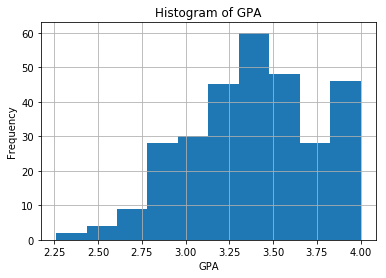

In [19]:
# plot one column
dfTrain['gpa'].hist()
pl.title('Histogram of GPA')
pl.xlabel('GPA')
pl.ylabel('Frequency')
pl.show()


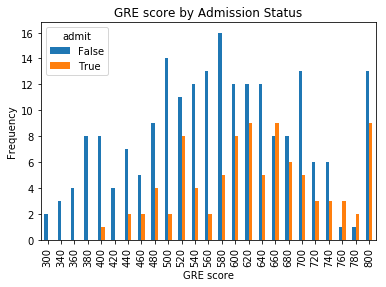

In [20]:
# barplot of gre score grouped by admission status (True or False)
pd.crosstab(dfTrain.gre, dfTrain.admit.astype(bool)).plot(kind='bar')
pl.title('GRE score by Admission Status')
pl.xlabel('GRE score')
pl.ylabel('Frequency')
pl.show()


In [21]:
# dummify prestige
dummy_ranks = pd.get_dummies(dfTrain['prestige'], prefix='prestige')
print (dummy_ranks.head())

   prestige_best  prestige_good  prestige_ok  prestige_veryGood
0              0              1            0                  0
1              0              1            0                  0
2              1              0            0                  0
3              0              0            1                  0
4              0              0            1                  0


In [22]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = dfTrain[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_good':])
print (data.head())

   admit  gre   gpa  prestige_good  prestige_ok  prestige_veryGood
0      0  380  3.61              1            0                  0
1      1  660  3.67              1            0                  0
2      1  800  4.00              0            0                  0
3      1  640  3.19              0            1                  0
4      0  520  2.93              0            1                  0


In [24]:
# manually add the intercept
data['intercept'] = 1.0

print (data.head())


   admit  gre   gpa  prestige_good  prestige_ok  prestige_veryGood  intercept
0      0  380  3.61              1            0                  0        1.0
1      1  660  3.67              1            0                  0        1.0
2      1  800  4.00              0            0                  0        1.0
3      1  640  3.19              0            1                  0        1.0
4      0  520  2.93              0            1                  0        1.0


In [26]:
train_cols = data.columns[1:]
print (data.columns[1:])

Index(['gre', 'gpa', 'prestige_good', 'prestige_ok', 'prestige_veryGood',
       'intercept'],
      dtype='object')


In [27]:
#Logistic Regression
logit = sm.Logit(data['admit'], data[train_cols])

In [28]:
# fit the model
result = logit.fit()
print (result.summary())


Optimization terminated successfully.
         Current function value: 0.546708
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  300
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 Mar 2017   Pseudo R-squ.:                  0.1131
Time:                        01:10:31   Log-Likelihood:                -164.01
converged:                       True   LL-Null:                       -184.92
                                        LLR p-value:                 6.406e-08
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
gre                   0.0030      0.001      2.346      0.019       0.000       0.006
gpa     

In [29]:
# recreate the dummy variables
dummy_ranks_test = pd.get_dummies(dfTest['prestige'], prefix='prestige')
print (dummy_ranks_test)

    prestige_best  prestige_good  prestige_ok  prestige_veryGood
0               0              0            0                  1
1               0              1            0                  0
2               0              0            0                  1
3               0              0            0                  1
4               0              1            0                  0
5               0              0            1                  0
6               1              0            0                  0
7               0              0            0                  1
8               0              0            0                  1
9               0              1            0                  0
10              0              1            0                  0
11              0              0            0                  1
12              0              1            0                  0
13              0              0            1                  0
14              0        

In [30]:
#create intercept column
dfTest['intercept'] = 1.0

In [31]:
# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
dfTest = dfTest[cols_to_keep].join(dummy_ranks_test.ix[:, 'prestige_good':])


In [33]:
# make predictions on the enumerated dataset
dfTest['admit_pred'] = result.predict(dfTest[train_cols])

#see probabilities
print (dfTest.head())

   gre   gpa  prestige  intercept  prestige_good  prestige_ok  \
0  640  3.30  veryGood        1.0              0            0   
1  660  3.60      good        1.0              1            0   
2  400  3.15  veryGood        1.0              0            0   
3  680  3.98  veryGood        1.0              0            0   
4  220  2.83      good        1.0              1            0   

   prestige_veryGood  admit_pred  
0                  1    0.378513  
1                  0    0.254527  
2                  1    0.204146  
3                  1    0.564259  
4                  0    0.042246  


In [34]:
#convert probabilities to 'yes' 'no'
dfTest['admit_yn']= np.where(dfTest['admit_pred'] > 0.5,'yes','no')
print (dfTest.head())

   gre   gpa  prestige  intercept  prestige_good  prestige_ok  \
0  640  3.30  veryGood        1.0              0            0   
1  660  3.60      good        1.0              1            0   
2  400  3.15  veryGood        1.0              0            0   
3  680  3.98  veryGood        1.0              0            0   
4  220  2.83      good        1.0              1            0   

   prestige_veryGood  admit_pred admit_yn  
0                  1    0.378513       no  
1                  0    0.254527       no  
2                  1    0.204146       no  
3                  1    0.564259      yes  
4                  0    0.042246       no  


In [35]:
cols= ['gre', 'gpa', 'admit_yn']
dfTest[cols].groupby('admit_yn').mean()

,gre,gpa
admit_yn,,
no,556.585366,3.324268
yes,676.666667,3.750000
